In [889]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Load the data set

In [890]:
data = pd.read_csv('../artifacts/BHP.csv')

In [891]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [892]:
data.shape

(13320, 9)

In [893]:
#check value count
for columns in data.columns:
    print(data[columns].value_counts())
    print("-"*40)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: i

In [894]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [895]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [896]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [897]:
missing_pct = (data.isnull().sum() / len(data)) * 100
print(missing_pct)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


In [898]:
data['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [899]:
data_copy = data.copy()

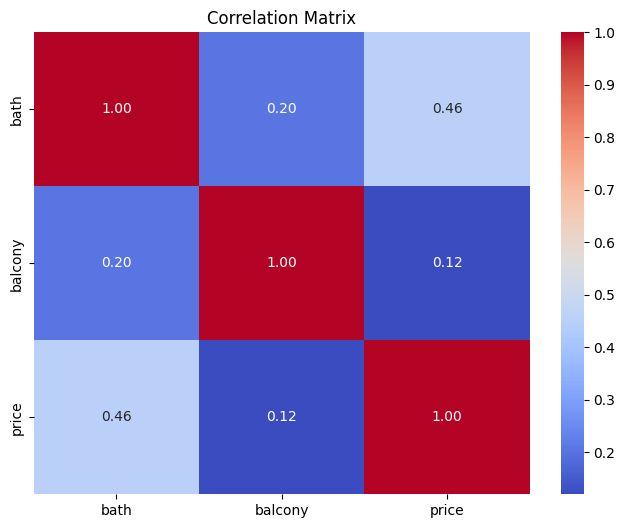

In [900]:
import seaborn as sns

plt.figure(figsize=(8, 6))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Preprocess

#### Remove and fill empty fields

In [901]:
data =  data.drop(["society"], axis=1)

In [902]:
data["balcony"].fillna(data["balcony"].mean().round().astype(int) , inplace=True)

/var/folders/09/694wl4t91p3f19bhxpt3dqtw0000gn/T/ipykernel_89241/2674465398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["balcony"].fillna(data["balcony"].mean().round().astype(int) , inplace=True)


In [903]:
data["balcony"] = data["balcony"].round().astype(int)

In [904]:
data['balcony'].value_counts()

balcony
2    5722
1    4897
3    1672
0    1029
Name: count, dtype: int64

In [905]:
data.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [906]:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [907]:
location_freq = data['location'].value_counts()
data['location'] = data['location'].map(location_freq)

In [908]:
data['location'].value_counts()

location
540.0    540
1.0      480
399.0    399
3.0      399
2.0      348
        ... 
41.0      41
38.0      38
37.0      37
35.0      35
34.0      34
Name: count, Length: 91, dtype: int64

In [909]:
data['location']= data['location'].fillna('Whitefield')

In [910]:
data["size"] = data['size'].fillna("2BHK")

In [911]:
data.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [912]:
data['bath'] = data['bath'].fillna(data['bath'].dropna().median())

In [913]:
data["bath"].value_counts().sum()

np.int64(13320)

In [914]:
data['bath'].dropna().median()

np.float64(2.0)

In [915]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [916]:
data.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,132.0,2 BHK,1056,2.0,1,39.07
1,Plot Area,Ready To Move,17.0,4 Bedroom,2600,5.0,3,120.00
2,Built-up Area,Ready To Move,186.0,3 BHK,1440,2.0,3,62.00
3,Super built-up Area,Ready To Move,23.0,3 BHK,1521,3.0,1,95.00
4,Super built-up Area,Ready To Move,66.0,2 BHK,1200,2.0,1,51.00


In [917]:
data['bhk']= data['size'].str.extract('(\d+)').astype(float).astype('Int64')

In [918]:
data['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13320, dtype: Int64

In [919]:
print(data['bhk'].unique())

<IntegerArray>
[2, 4, 3, 6, 1, 8, 7, 5, 11, 9, 27, 10, 19, 16, 43, 14, 12, 13, 18]
Length: 19, dtype: Int64


In [920]:
print(data['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '2BHK' '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [921]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [922]:
def ConvertRange(x):
    try:
        # If it's a range like '2100 - 2850'
        if '-' in str(x):
            temp = x.split('-')
            if len(temp) == 2:
                return (float(temp[0]) + float(temp[1])) / 2
        # Try to convert directly if it's a number
        return float(x)
    except:
        return None   

data['total_sqft']= data['total_sqft'].apply(ConvertRange)

In [923]:
data['total_sqft'] = data['total_sqft'].fillna(data['total_sqft'].dropna().median())

In [924]:
data[['size', 'total_sqft']].head(10)

,size,total_sqft
0,2 BHK,1056.0
1,4 Bedroom,2600.0
2,3 BHK,1440.0
3,3 BHK,1521.0
4,2 BHK,1200.0
5,2 BHK,1170.0
6,4 BHK,2732.0
7,4 BHK,3300.0
8,3 BHK,1310.0
9,6 Bedroom,1020.0


In [925]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  float64
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  int64  
 7   price         13320 non-null  float64
 8   bhk           13320 non-null  Int64  
dtypes: Int64(1), float64(3), int64(1), object(4)
memory usage: 949.7+ KB


In [926]:
data['price'].max

<bound method Series.max of 0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64>

In [927]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,132.0,2 BHK,1056.0,2.0,1,39.07,2
1,Plot Area,Ready To Move,17.0,4 Bedroom,2600.0,5.0,3,120.00,4
2,Built-up Area,Ready To Move,186.0,3 BHK,1440.0,2.0,3,62.00,3
3,Super built-up Area,Ready To Move,23.0,3 BHK,1521.0,3.0,1,95.00,3
4,Super built-up Area,Ready To Move,66.0,2 BHK,1200.0,2.0,1,51.00,2


In [928]:
data["price_per_sqft"]= data['price']*100000 / data['total_sqft']

In [929]:
data["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [930]:
print(data[['balcony', 'price']].corr())

          balcony     price
balcony  1.000000  0.124951
price    0.124951  1.000000


In [931]:
(data['total_sqft']/ data['bhk']).describe()

count       13320.0
mean     575.122682
std      388.133558
min            0.25
25%           473.0
50%           552.5
75%           625.0
max         26136.0
dtype: Float64

In [932]:
data.shape

(13320, 10)

In [933]:
data.price_per_sqft.describe()

count    1.332000e+04
mean     7.919404e+03
std      1.062471e+05
min      2.678298e+02
25%      4.266667e+03
50%      5.440000e+03
75%      7.328359e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

/var/folders/09/694wl4t91p3f19bhxpt3dqtw0000gn/T/ipykernel_89241/581659790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price_per_sqft"])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

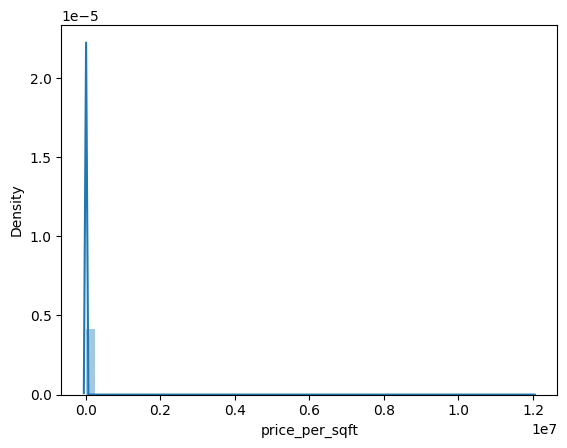

In [934]:
sns.distplot(data["price_per_sqft"])

In [935]:
data[data["price_per_sqft"]>25000].count()

area_type         110
availability      110
location          110
size              110
total_sqft        110
bath              110
balcony           110
price             110
bhk               110
price_per_sqft    110
dtype: int64

In [936]:
data1 = data[data["price_per_sqft"] <= 25000]
data1

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,132.0,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Plot Area,Ready To Move,17.0,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Built-up Area,Ready To Move,186.0,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,23.0,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,66.0,2 BHK,1200.0,2.0,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,540.0,5 Bedroom,3453.0,4.0,0,231.00,5,6689.834926
13316,Super built-up Area,Ready To Move,7.0,4 BHK,3600.0,5.0,2,400.00,4,11111.111111
13317,Built-up Area,Ready To Move,171.0,2 BHK,1141.0,2.0,1,60.00,2,5258.545136
13318,Super built-up Area,18-Jun,28.0,4 BHK,4689.0,4.0,1,488.00,4,10407.336319


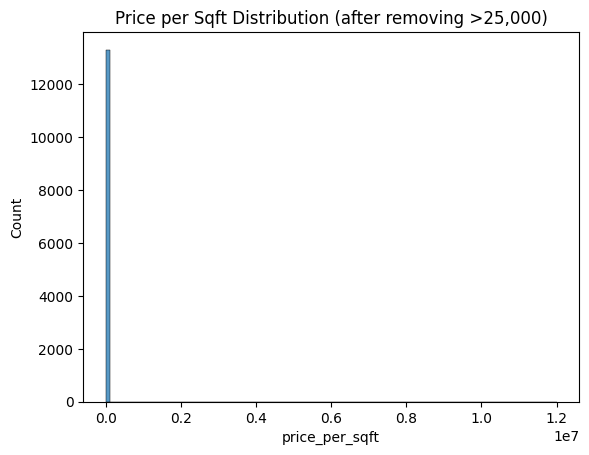

In [937]:
sns.histplot(data["price_per_sqft"], bins=100)
plt.title("Price per Sqft Distribution (after removing >25,000)")
plt.show()

In [938]:
# Cap high outliers in price_per_sqft at 25,000
cap_value = 25000
data['price_per_sqft'] = data['price_per_sqft'].apply(lambda x: cap_value if x > cap_value else x)

In [939]:
lower_cap = 500
data['price_per_sqft'] = data['price_per_sqft'].apply(
    lambda x: lower_cap if x < lower_cap else x
)

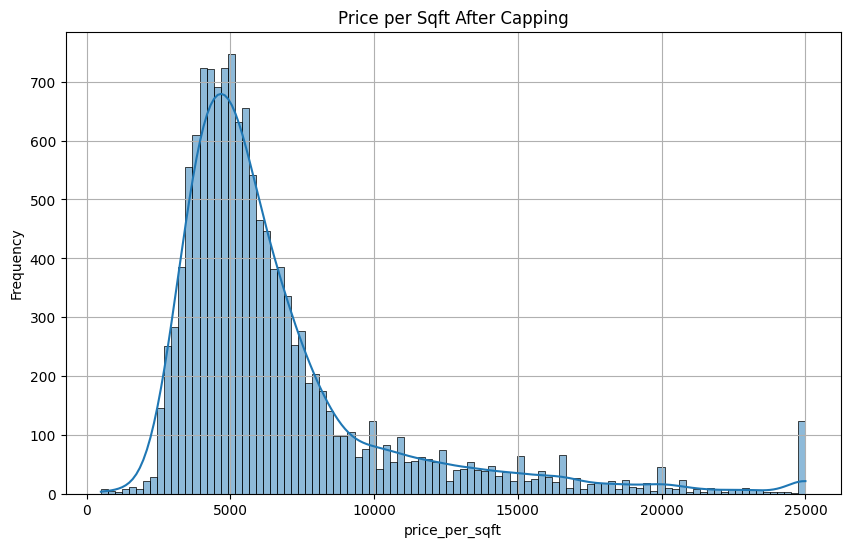

In [940]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft'], bins=100, kde=True)
plt.title("Price per Sqft After Capping")
plt.xlabel("price_per_sqft")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [941]:
print("Max price_per_sqft after capping:", data['price_per_sqft'].max())
print("Min price_per_sqft after capping:", data['price_per_sqft'].min())

Max price_per_sqft after capping: 25000.0
Min price_per_sqft after capping: 500.0


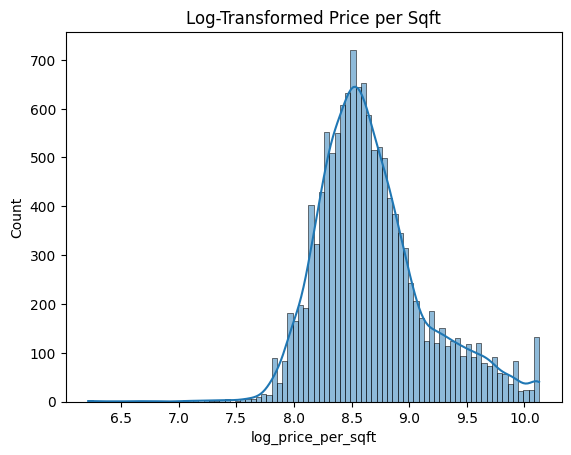

In [942]:
data['log_price_per_sqft'] = np.log1p(data['price_per_sqft'])
sns.histplot(data['log_price_per_sqft'], kde=True)
plt.title("Log-Transformed Price per Sqft")
plt.show()

In [943]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,log_price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.0,13320.000000,13320.000000
mean,1558.647202,2.688814,1.603378,112.565627,2.802778,6645.604520,8.675823
std,1236.376834,1.338754,0.803067,148.971674,1.294496,3966.968544,0.473394
min,1.000000,1.000000,0.000000,8.000000,1.0,500.000000,6.216606
25%,1100.000000,2.000000,1.000000,50.000000,2.0,4266.666667,8.358823
50%,1276.000000,2.000000,2.000000,72.000000,3.0,5440.000000,8.601718
75%,1678.000000,3.000000,2.000000,120.000000,3.0,7328.358978,8.899643
max,52272.000000,40.000000,3.000000,3600.000000,43.0,25000.000000,10.126671


/var/folders/09/694wl4t91p3f19bhxpt3dqtw0000gn/T/ipykernel_89241/4092167057.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bhk"])


<Axes: xlabel='bhk', ylabel='Density'>

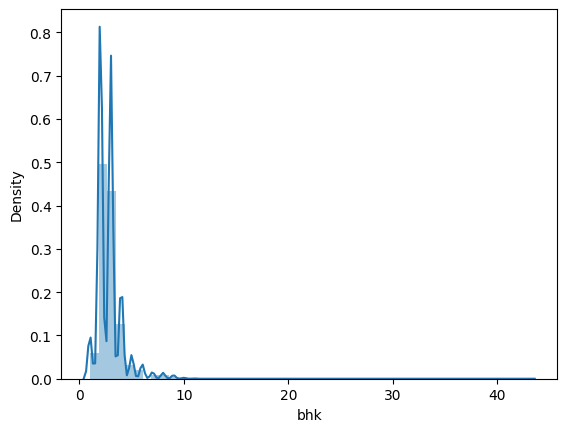

In [944]:
sns.distplot(data["bhk"])

In [945]:
#caping bhk values at 8
data['bhk'] = data['bhk'].apply(lambda x: 8 if x > 8 else x)

In [946]:
print("Max bhk after capping:", data['bhk'].max())
print("Min bhk after capping:", data['bhk'].min())

Max bhk after capping: 8
Min bhk after capping: 1


Max BHK after capping: 8


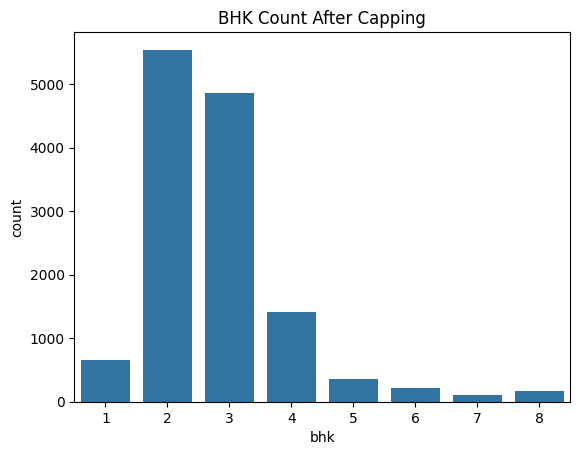

In [947]:
print("Max BHK after capping:", data['bhk'].max())
sns.countplot(x='bhk', data=data)
plt.title("BHK Count After Capping")
plt.show()

In [948]:
data.shape

(13320, 11)

In [949]:
data

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,log_price_per_sqft
0,Super built-up Area,19-Dec,132.0,2 BHK,1056.0,2.0,1,39.07,2,3699.810606,8.216307
1,Plot Area,Ready To Move,17.0,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615,8.437367
2,Built-up Area,Ready To Move,186.0,3 BHK,1440.0,2.0,3,62.00,3,4305.555556,8.367894
3,Super built-up Area,Ready To Move,23.0,3 BHK,1521.0,3.0,1,95.00,3,6245.890861,8.739839
4,Super built-up Area,Ready To Move,66.0,2 BHK,1200.0,2.0,1,51.00,2,4250.000000,8.354910
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,540.0,5 Bedroom,3453.0,4.0,0,231.00,5,6689.834926,8.808494
13316,Super built-up Area,Ready To Move,7.0,4 BHK,3600.0,5.0,2,400.00,4,11111.111111,9.315791
13317,Built-up Area,Ready To Move,171.0,2 BHK,1141.0,2.0,1,60.00,2,5258.545136,8.567800
13318,Super built-up Area,18-Jun,28.0,4 BHK,4689.0,4.0,1,488.00,4,10407.336319,9.250362


In [950]:
data.drop(columns=["size", "area_type", "price_per_sqft"], inplace=True)

In [951]:
data.head()

,availability,location,total_sqft,bath,balcony,price,bhk,log_price_per_sqft
0,19-Dec,132.0,1056.0,2.0,1,39.07,2,8.216307
1,Ready To Move,17.0,2600.0,5.0,3,120.00,4,8.437367
2,Ready To Move,186.0,1440.0,2.0,3,62.00,3,8.367894
3,Ready To Move,23.0,1521.0,3.0,1,95.00,3,8.739839
4,Ready To Move,66.0,1200.0,2.0,1,51.00,2,8.354910


In [952]:
location_counts = data['location'].value_counts()
rare_locations = location_counts[location_counts < 10].index

data['location'] = data['location'].apply(
    lambda x: 'Other' if x in rare_locations else x
)

data = pd.get_dummies(data, columns=['location'], drop_first=True)


In [953]:
def availability_encode(x):
    if x in ['Ready To Move', 'Immediate Possession']:
        return 1
    else:
        return 0

data['availability'] = data['availability'].apply(availability_encode)


In [954]:
data.head()

,availability,total_sqft,bath,balcony,price,bhk,log_price_per_sqft,location_2.0,location_3.0,location_4.0,...,location_175.0,location_177.0,location_186.0,location_213.0,location_234.0,location_273.0,location_302.0,location_399.0,location_540.0,location_Other
0,0,1056.0,2.0,1,39.07,2,8.216307,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2600.0,5.0,3,120.00,4,8.437367,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1440.0,2.0,3,62.00,3,8.367894,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1,1521.0,3.0,1,95.00,3,8.739839,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1200.0,2.0,1,51.00,2,8.354910,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Train Data set

In [955]:
X = data.drop('price',axis=1)
y = data['price']

In [956]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 ,random_state=42)

In [957]:
X_train.shape 

(10656, 97)

In [958]:
data.isna().sum()


availability      0
total_sqft        0
bath              0
balcony           0
price             0
                 ..
location_273.0    0
location_302.0    0
location_399.0    0
location_540.0    0
location_Other    0
Length: 98, dtype: int64

In [973]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
acc =lr.score(X_test,y_test)
y_pred = lr.predict(X_test)
print(str(lr)+ ' ----> ' +str(acc))
print(f'{lr} Performance:')
print("RMSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

LinearRegression() ----> 0.6853643495276114
LinearRegression() Performance:
RMSE: 6698.762306823099
MAE: 36.72054512894759
R² Score: 0.6853643495276114


In [976]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train,y_train)
acc =la.score(X_test,y_test)
y_pred = la.predict(X_test)
print(str(la)+ ' ----> ' +str(acc))
print(f'{la} Performance:')
print("RMSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Lasso() ----> 0.6877660516156777
Lasso() Performance:
RMSE: 6647.628776990728
MAE: 35.67211850001562
R² Score: 0.6877660516156777


In [977]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
acc =rf.score(X_test,y_test)
y_pred = rf.predict(X_test)
print(str(rf)+ ' ----> ' +str(acc))
print(f'{rf} Performance:')
print("RMSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RandomForestRegressor() ----> 0.9699088164838439
RandomForestRegressor() Performance:
RMSE: 640.6574893947468
MAE: 3.235000025025025
R² Score: 0.9699088164838439


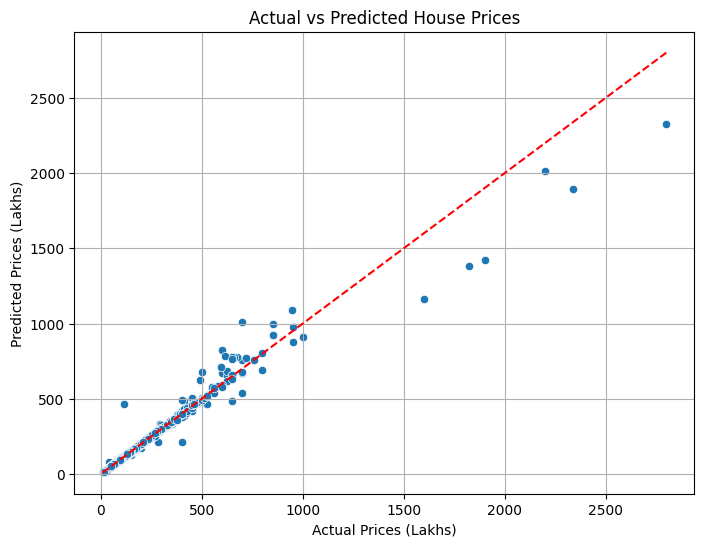

In [978]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Prices (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

In [981]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(rf,file)